# Find Best Cluster Analysis Results Using Customer Transactions Dataset

### Kaan Akkartal 2020661

# 1. Library and Data Loading

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
customer = pd.read_csv("CustomerTransactions.csv")
df = customer.copy()
df.head()

,ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,Anderson,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,Bailey,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Baker,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# 2. Descriptive Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                100 non-null    int64 
 1   CustomerLastName  100 non-null    object
 2   X1                100 non-null    int64 
 3   X2                100 non-null    int64 
 4   X3                100 non-null    int64 
 5   X4                100 non-null    int64 
 6   X5                100 non-null    int64 
 7   X6                100 non-null    int64 
 8   X7                100 non-null    int64 
 9   X8                100 non-null    int64 
 10  X9                100 non-null    int64 
 11  X10               100 non-null    int64 
 12  X11               100 non-null    int64 
 13  X12               100 non-null    int64 
 14  X13               100 non-null    int64 
 15  X14               100 non-null    int64 
 16  X15               100 non-null    int64 
 17  X16              

In [4]:
df.isnull().sum()

ID                  0
CustomerLastName    0
X1                  0
X2                  0
X3                  0
X4                  0
X5                  0
X6                  0
X7                  0
X8                  0
X9                  0
X10                 0
X11                 0
X12                 0
X13                 0
X14                 0
X15                 0
X16                 0
X17                 0
X18                 0
X19                 0
X20                 0
X21                 0
X22                 0
X23                 0
X24                 0
X25                 0
X26                 0
X27                 0
X28                 0
X29                 0
X30                 0
X31                 0
X32                 0
dtype: int64

There are no missing values. 

In [6]:
X = df.drop(columns = ["ID", "CustomerLastName"])

ID and CustomerLastName are not included to modelling. 

# 3. K-Means 

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [20]:
k_list = np.arange(1,20)
inertia_list=[]

for k in k_list:
    k_means = KMeans(init='k-means++', n_clusters=k)
    k_means.fit(X)
    inertia_list.append(k_means.inertia_)

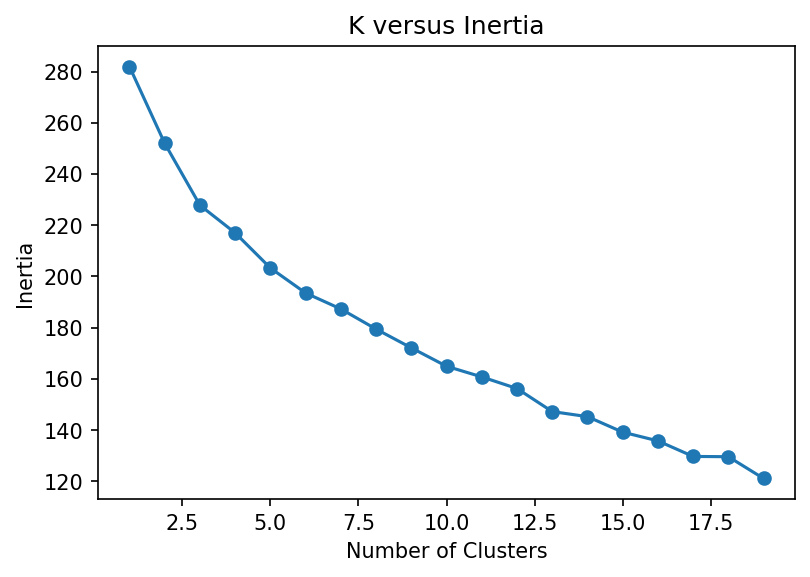

In [21]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.plot(k_list, inertia_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K versus Inertia")
plt.show()

k = 3 seems optimum cluster number. 

In [24]:
k_means = KMeans(init='k-means++', n_clusters=3)
k_fit = k_means.fit(X)
y_kmeans = k_fit.labels_

In [25]:
y_kmeans

array([2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0])

In [27]:
kmeans_result = pd.DataFrame({"Customer": df.CustomerLastName, "KMeansCluster": y_kmeans})
kmeans_result

,Customer,KMeansCluster
0,Adams,2
1,Allen,0
2,Anderson,1
3,Bailey,2
4,Baker,0
...,...,...
95,Williams,0
96,Wilson,2
97,Wood,0
98,Wright,0


# 4. Hierarchical Clustering 


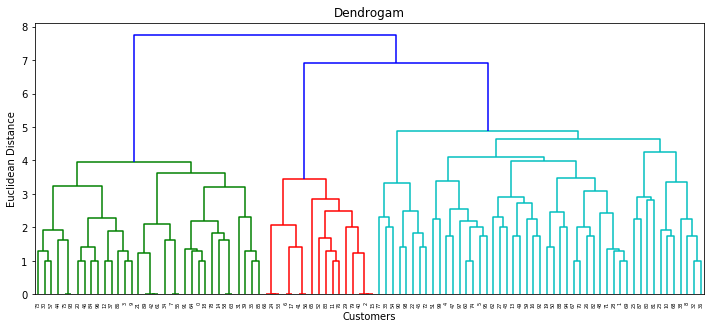

In [33]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (12,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg_fit = AgglomerativeClustering(n_clusters=3).fit(X)

In [38]:
agg_fit

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [40]:
y_agg = agg_fit.labels_
y_agg

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
agg_result = pd.DataFrame({"Customer": df.CustomerLastName, "AggCluster": y_agg})
agg_result

,Customer,AggCluster
0,Adams,1
1,Allen,0
2,Anderson,2
3,Bailey,1
4,Baker,0
...,...,...
95,Williams,0
96,Wilson,1
97,Wood,0
98,Wright,0


# 5. Comparison 

In [42]:
overall_comparison = pd.DataFrame({"Customer": df.CustomerLastName, "KMeansCluster": y_kmeans, "AggCluster": y_agg})
overall_comparison

,Customer,KMeansCluster,AggCluster
0,Adams,2,1
1,Allen,0,0
2,Anderson,1,2
3,Bailey,2,1
4,Baker,0,0
...,...,...,...
95,Williams,0,0
96,Wilson,2,1
97,Wood,0,0
98,Wright,0,0


In [43]:
overall_comparison["Comparison"] = overall_comparison["KMeansCluster"] - overall_comparison["AggCluster"]
overall_comparison

,Customer,KMeansCluster,AggCluster,Comparison
0,Adams,2,1,1
1,Allen,0,0,0
2,Anderson,1,2,-1
3,Bailey,2,1,1
4,Baker,0,0,0
...,...,...,...,...
95,Williams,0,0,0
96,Wilson,2,1,1
97,Wood,0,0,0
98,Wright,0,0,0


In [46]:
overall_comparison.Comparison.value_counts()

 0    46
 1    34
-1    16
 2     3
-2     1
Name: Comparison, dtype: int64

46 customers are in the same cluster with K-Means and Agglomerative, however 54 of them are in different cluster. 